In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 14 22:14:55 2017
@author: rodrigo
"""

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import operator as op
import re
import random

In [17]:
# Importing the dataset
# by with one class
def get_dataset():
    
    X = []
    
    with open('full.csv', 'r', encoding="latin-1") as file:
        for line in file:
            data = line.split('|')
            if len(data) == 7:
                data_classes = data[1].split(',')
                if len(data_classes) == 1:
                    for cl in data_classes:
                        c = cl.upper()
                        c = c.replace(' ', '')
                        a = re.search(r'([A-Z])([0-9]{2})([A-Z])', c, re.M|re.I)
                        try:
                            if a.group(1) in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']:
                                cls = ord(a.group(1)) - 65 #letter to int
                                X.append([data[2], data[3], cls])
                        except:
                            pass

    return X

In [18]:
# get dataset
dataset = get_dataset()

In [23]:
len(dataset)

194750

In [26]:
# shuffle
random.shuffle(dataset)

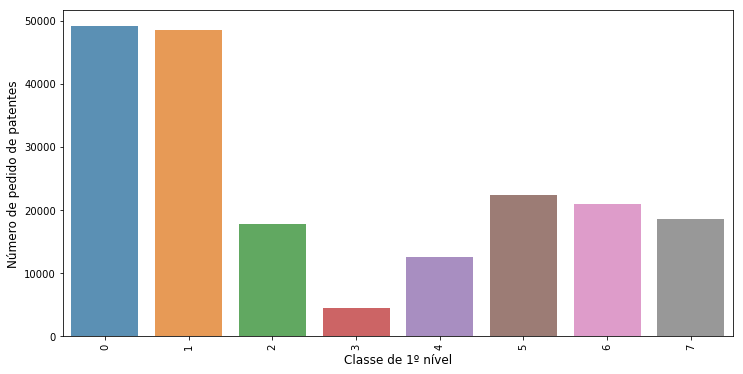

{0: 49184, 1: 48555, 2: 17861, 3: 4501, 4: 12645, 5: 22424, 6: 20977, 7: 18603}

In [33]:
# count examples per class
classes_count = {}
for data in dataset:
    if data[2] in classes_count:
        classes_count[data[2]] += 1
    else:
        classes_count[data[2]] = 1

sorted_keys, sorted_vals = zip(*sorted(classes_count.items(), key=op.itemgetter(0)))
plt.figure(figsize=(12,6))
sns.barplot(sorted_keys, sorted_vals, alpha=0.8)
plt.ylabel('Número de pedido de patentes', fontsize=12)
plt.xlabel('Classe de 1º nível', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

classes_count


In [41]:
# Cleaning the texts
# remove everything but letters
import re
import nltk
import unidecode
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

stemmer = SnowballStemmer('portuguese')
#stopwords = stopwords.words('portuguese')
#stopwords = [unidecode.unidecode(w) for w in stopwords]
stopwords = []
dataset_stemmer = []
X = dataset
for i in range(len(X)):
    title = X[i][0].split()
    summary = X[i][1].split()
    for j in range(len(title)):
        title[j] = re.sub('[^a-zA-Z]', '', title[j].lower())
    for j in range(len(summary)):
        summary[j] = re.sub('[^a-zA-Z]', '', summary[j].lower())
    title = [stemmer.stem(st) for st in title if st not in stopwords and len(st) > 2]
    summary = [stemmer.stem(st) for st in summary if st not in stopwords and len(st) > 2]
    title = ' '.join(title)
    summary = ' '.join(summary)
    dataset_stemmer.append([title, summary, X[i][2]])


In [42]:
dataset_stemmer[0]

['painel plastic luminiscent',
 'painel plastic luminiscent constitu plac plastic transparent transluc sulc uma das fac maior ilumin uma mais fac menor later form sulc apresent luminiscenc por reflexa luz incident intern material destacandos corp plac',
 6]

In [43]:
dataset[0]

["Painel pl'astico luminiscente",
 '"PAINEL PL\'ASTICO LUMINISCENTE", constitu\'ido de placa pl\'astica transparente ou transl\'ucida, sulcada em uma das faces maiores e iluminada em uma ou mais faces menores laterais, de forma a os sulcos apresentarem luminisc^encia por reflex~ao da luz incidente internamente ao material, destacando-se do corpo da placa.',
 6]

In [44]:
df = pd.DataFrame(dataset)
df.to_csv('full_8classes.csv', encoding='latin-1')

df = pd.DataFrame(dataset_stemmer)
df.to_csv('full_8classes_stemmer.csv', encoding='latin-1')

In [50]:
# get small train set and test set
# shuffle
random.shuffle(dataset)
# for 4k all classes are balanced with 4k examples
dataset_4k_stemmer_train = []
dataset_4k_stemmer_test = []
cls = [0]*8
for data in dataset_stemmer:
    if cls[data[2]] < 4000:
        cls[data[2]] += 1
        dataset_4k_stemmer_train.append(data)
    else:
        dataset_4k_stemmer_test.append(data)
        
df = pd.DataFrame(dataset_4k_stemmer_train)
df.to_csv('dataset_4k_stemmer_train.csv', encoding='latin-1')
df = pd.DataFrame(dataset_4k_stemmer_test)
df.to_csv('dataset_4k_stemmer_test.csv', encoding='latin-1')

In [55]:
# get small train set and test set
# shuffle
random.shuffle(dataset)
# for 12k, all classes are balanced with 12k examples except for D (3) with 4k.
# class D is then oversampled
dataset_12k_stemmer_train = []
dataset_12k_stemmer_test = []
cls = [0]*8
for data in dataset_stemmer:
    if data[2] == 3:
        if cls[data[2]] < 4000:
            cls[data[2]] += 1
            dataset_12k_stemmer_train.append(data)
            dataset_12k_stemmer_train.append(data)
            dataset_12k_stemmer_train.append(data)
        else:
            dataset_12k_stemmer_test.append(data)
    elif  cls[data[2]] < 12000:
        cls[data[2]] += 1
        dataset_12k_stemmer_train.append(data)
    else:
        dataset_12k_stemmer_test.append(data)
        
df = pd.DataFrame(dataset_12k_stemmer_train)
df.to_csv('dataset_12k_stemmer_train.csv', encoding='latin-1')
df = pd.DataFrame(dataset_12k_stemmer_test)
df.to_csv('dataset_12k_stemmer_test.csv', encoding='latin-1')

In [3]:
# Importing the dataset
# by a first class
def get_dataset_first():
    
    X = []
    
    with open('full.csv', 'r', encoding="latin-1") as file:
        for line in file:
            data = line.split('|')
            if len(data) == 7:
                data_classes = data[1].split(',')
                cl = data_classes[0]
                c = cl.upper()
                c = c.replace(' ', '')
                a = re.search(r'([A-Z])([0-9]{2})([A-Z])', c, re.M|re.I)
                try:
                    if a.group(1) in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']:
                        cls = ord(a.group(1)) - 65 #letter to int
                        X.append([data[2], data[3], cls])
                except:
                    pass

    return X

In [4]:
# get dataset
dataset_f = get_dataset_first()

In [5]:
len(dataset_f)

354382

In [6]:
dataset_f[0]

['Processo para a fabrica$c~ao de budesonida',
 "A presente inven$c~ao se relaciona a um processo novo para a fabrica$c~ao de (22 R,S)-16<224>, 17<224> butilidenodioxi-11<F128M>b<F255D>, 21-dihidroxipregna-1,4-dieno-3,20-diona (I), reagindo-se 11<F128M>b<F255D>, 16<224>,17<224>, 21-tetrahidroxipregna-1,4-dieno-3,20-diona (II) com butanol, CH~ 3~ CH~ 2~ CH~ 2~CHO em acetonitrila com 'acido p-tolueno sulf^onico com um catalisador.",
 2]

In [8]:
# Cleaning the texts
# remove everything but letters
import re
import nltk
import unidecode
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

stemmer = SnowballStemmer('portuguese')
dataset_f_stemmer = []
X = dataset_f
for i in range(len(X)):
    title = X[i][0].split()
    summary = X[i][1].split()
    for j in range(len(title)):
        title[j] = re.sub('[^a-zA-Z]', '', title[j].lower())
    for j in range(len(summary)):
        summary[j] = re.sub('[^a-zA-Z]', '', summary[j].lower())
    title = [stemmer.stem(st) for st in title]
    summary = [stemmer.stem(st) for st in summary]
    title = ' '.join(title)
    summary = ' '.join(summary)
    dataset_f_stemmer.append([title, summary, X[i][2]])

In [10]:
df = pd.DataFrame(dataset_f_stemmer)
df.to_csv('full_8classes_f_stemmer.csv', encoding='latin-1')

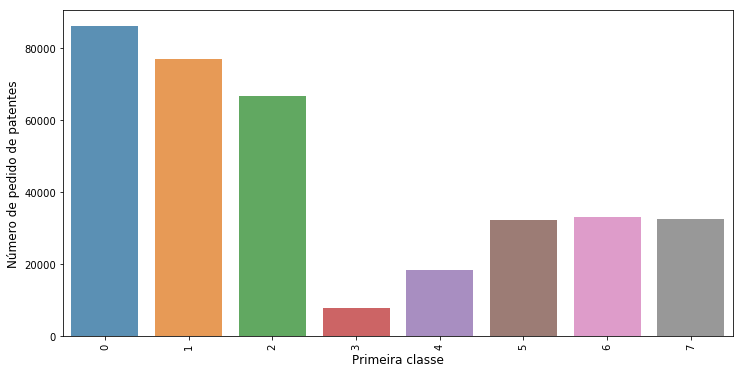

{0: 86248, 1: 76929, 2: 66779, 3: 7787, 4: 18497, 5: 32449, 6: 33208, 7: 32485}

In [11]:
# count examples per class
classes_count = {}
for data in dataset_f:
    if data[2] in classes_count:
        classes_count[data[2]] += 1
    else:
        classes_count[data[2]] = 1

sorted_keys, sorted_vals = zip(*sorted(classes_count.items(), key=op.itemgetter(0)))
plt.figure(figsize=(12,6))
sns.barplot(sorted_keys, sorted_vals, alpha=0.8)
plt.ylabel('Número de pedido de patentes', fontsize=12)
plt.xlabel('Primeira classe', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

classes_count


In [12]:
# Cleaning the texts
# remove everything but letters
import re
import nltk
import unidecode
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

stemmer = SnowballStemmer('portuguese')
dataset_f_no_stemmer = []
X = dataset_f
for i in range(len(X)):
    title = X[i][0].split()
    summary = X[i][1].split()
    for j in range(len(title)):
        title[j] = re.sub('[^a-zA-Z]', '', title[j].lower())
    for j in range(len(summary)):
        summary[j] = re.sub('[^a-zA-Z]', '', summary[j].lower())
    title = ' '.join(title)
    summary = ' '.join(summary)
    dataset_f_no_stemmer.append([title, summary, X[i][2]])
    
df = pd.DataFrame(dataset_f_no_stemmer)
df.to_csv('full_8classes_f_no_stemmer.csv', encoding='latin-1')

In [13]:
dataset_f_no_stemmer[0]

['processo para a fabricacao de budesonida',
 'a presente invencao se relaciona a um processo novo para a fabricacao de  rs  butilidenodioxifmbfd dihidroxipregnadienodiona i reagindose fmbfd  tetrahidroxipregnadienodiona ii com butanol ch  ch  ch cho em acetonitrila com acido ptolueno sulfonico com um catalisador',
 2]

In [14]:
dataset_f_stemmer[0]

['process par a fabricaca de budeson',
 'a present invenca se relacion a um process nov par a fabricaca de  rs  butilidenodioxifmbfd dihidroxipregnadienodion i reagindos fmbfd  tetrahidroxipregnadienodion ii com butanol ch  ch  ch cho em acetonitril com acid ptoluen sulfon com um catalis',
 2]